<a href="https://colab.research.google.com/github/jiananwu72/LuFeO3Detect/blob/main/LuFeO3/LFOHyperspy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pyNSID sidpy atomap nanonispy gwyfile pyTEMlib wget ipympl importlib
!pip install numpy==1.26.4

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pylab as plt
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


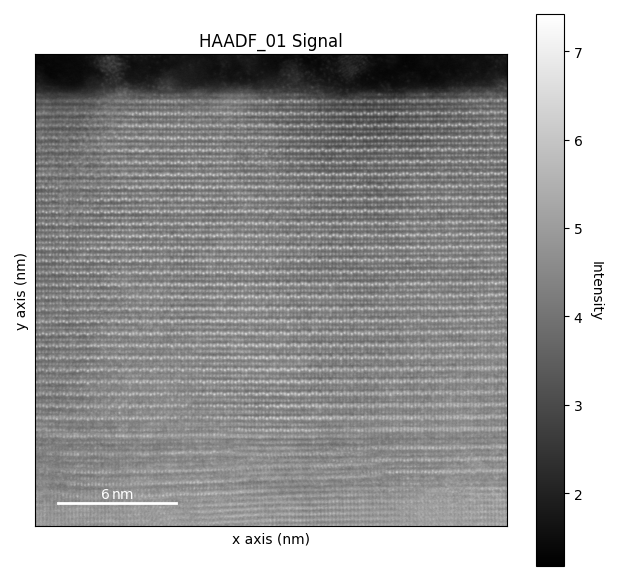

In [3]:
import hyperspy.api as hs
dataset = hs.load('/content/drive/MyDrive/Data/LFO/HAADF_01.dm3')
dataset.plot();

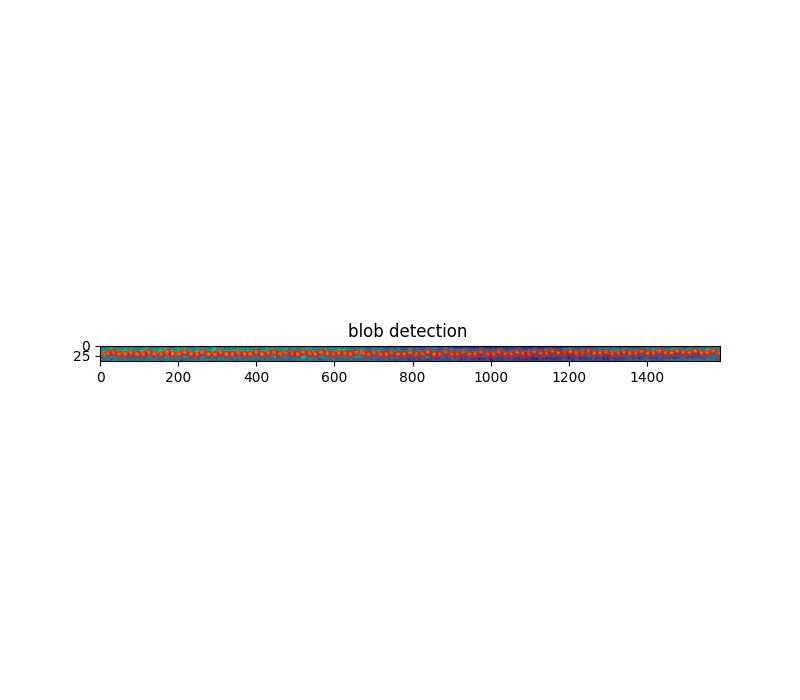

In [27]:
import skimage
# ------- Input ------
threshold = 0.4 #usally between 0.01 and 0.9  the smaller the more atoms
atom_size = 0.1 #in nm
min_atom_size = 0.06 #in nm
# ----------------------

dataset_cropped = dataset.isig[360:-100, 295:335]
image = dataset_cropped

scale_x =image.axes_manager['x'].scale
blobs = skimage.feature.blob_log(image, min_sigma = min_atom_size/scale_x, max_sigma=atom_size/scale_x, threshold=threshold)

fig1, ax = plt.subplots(1, 1,figsize=(8,7), sharex=True, sharey=True)
plt.title("blob detection ")

plt.imshow(image, interpolation='nearest', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
plt.scatter(blobs[:, 1], blobs[:, 0], c='r', s=20, alpha = .5);

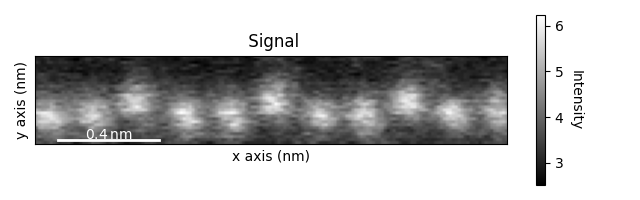

In [30]:
windows = []
image = dataset_cropped
radius_x = 80
radius_y = 15
for i in range(blobs.shape[0]):
    x = int(blobs[i][1])
    y = int(blobs[i][0])
    if x > radius_x and x < image.data.shape[1]-radius_x and y > radius_y and y < image.data.shape[0]-radius_y:
        window = image.isig[x - radius_x:x + radius_x, y - radius_y:y + radius_y]
        windows.append(window)

windows[3].plot();

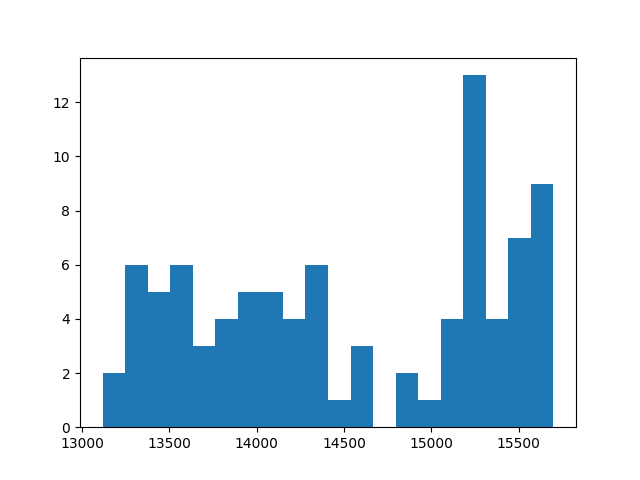

In [19]:
sums = []
for i in range(len(windows)):
    sums.append(np.sum(np.array(windows[i])))

plt.figure()
plt.hist(sums, bins=20);

In [20]:
len(windows)

90